In [13]:
# Load the data (model parameters, subject_id, and trip_label)
import os
import json
import pandas as pd


trip_driver_mapping_df = pd.read_csv(r'C:\git\kdp_hlb_evalframework\_temp\JP_extreme_experiment_ID_mapping.csv', sep=";")
parameters_directory_path = os.path.join(r'C:\git\kdp_hlb_evalframework\_temp\modeling\trip_parameters')

database_rows = list()
for parameter_json_file in os.listdir(parameters_directory_path):
    trip_label = "_".join(parameter_json_file.split("_")[:-1]) # remove the "_parameters.json" part
    subject_id = trip_driver_mapping_df[trip_driver_mapping_df["trip_label"] == trip_label]["subject_id"].iloc[0]
    with open(os.path.join(parameters_directory_path, parameter_json_file), "r") as parameters_file:
        parameters_dict = json.load(parameters_file)
        parameters_dict["trip_label"] = trip_label
        parameters_dict["subject_id"] = subject_id
        database_rows.append(parameters_dict)
driver_trip_parameters_df = pd.DataFrame(database_rows)
driver_trip_parameters_df.to_csv(r'C:\git\kdp_hlb_evalframework\_temp\analysis\model_parameters\japan_parameters.csv')

Text(0.5, 1.0, 'Model parameters of the Golf data per driver type')

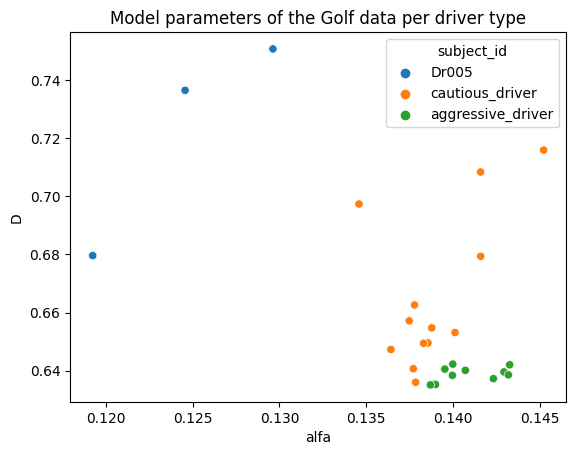

In [60]:
# Display the parameters per driver
import seaborn as sns
import matplotlib.pyplot as plt

# {
#     "K": 1.0,
#     "D": 0.7365619147021278,
#     "w0": 0.4649135927921947,
#     "tc": 2.3093253858218374,
#     "alfa": 0.12455881383592146,
#     "t_delay": 0.26311969761843773
# }

sns.scatterplot(data=driver_trip_parameters_df, x="alfa", y="D", hue="subject_id")
plt.title("Model parameters of the Golf data per driver type")

In [ ]:
# Cluster the subjects
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_dimension_array: np.array = driver_trip_parameters_df[['D', 'alfa', 'tc']].to_numpy()

Centroids [[ 0.57431253  0.03079259]
 [-0.02127083 -0.00114047]]


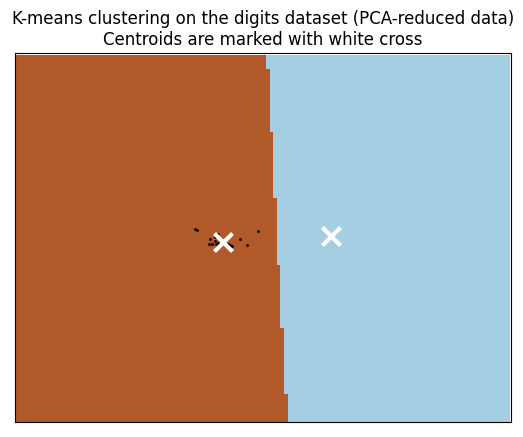

In [47]:
# Cluster the subjects
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

n_dimension_array: np.array = driver_trip_parameters_df[['D', 'alfa', 'tc']].to_numpy()
    
# Shape inputs
reducer = PCA(n_components=2)
reduced_data = reducer.fit_transform(n_dimension_array)
i = 2
kmeans = KMeans(init="k-means++", n_clusters=i, n_init=2)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(i-1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)
plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
print("Centroids", centroids)
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)      
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()